# Exercício - Análise Estatística com Statsmodels

![Logo de capa](Exercicio-Statsmodels-Logo.png)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Desenvolvimento](#development)
    * [2.1.Carregamento dos Dados](#data_load)
    * [2.2.Análise da variável predita](#feature_analysis)
    * [2.3.Análise da variável preditora](#target_analysis)
    * [2.4.Modelo Estatístico](#model)
- [3.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

O projeto é um exercício realizado a partir do exemplo fornecido no capítulo 14 do curso citado em referências.



---
<a id='development'></a>
## 2. Desenvolvimento

Problema de Negócio:
Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade?
Caso exista relação, como podemos mensurá-la?

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stm
import statsmodels.api as sm

#%matplotlib inline

In [3]:
# Altera a exibição de float para quatro casas decimais
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(precision=4)

In [4]:
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [5]:
# Versões das bibliotecas usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sns.__version__)
print('Stasmodels versão ' + stm.__version__)

Numpy versão 1.23.5
Pandas versão 2.0.0
Matplotlib versão 3.7.1
Seaborn versão 0.12.2
Stasmodels versão 0.14.0


<a id='data_load'></a>
### 2.1 Carregamento dos Dados

In [6]:
# Carrega os dados e exibe as primeiras linhas do dataframe
df = pd.read_csv('dataset.csv')
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.9744,35,1939,1,0,0,1112
1,436.9743,104,1939,1,1,0,1112
2,355.7436,29,1971,2,0,0,2114
3,282.9231,39,1972,2,0,0,2148
4,807.2308,97,1985,1,0,0,2222


In [7]:
# Exibe as dimensões do dataframe
df.shape

(3000, 7)

In [8]:
# Exibe as informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [9]:
# Descreve com estatísticas o  dataframe
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000,3000.0000
mean,459.6431,67.3633,1956.3213,1.4410,0.0613,0.0420,1173.7987
std,195.8657,23.6758,22.2881,0.5452,0.2400,0.2006,678.1877
min,40.5128,20.0000,1918.0000,1.0000,0.0000,0.0000,113.0000
25%,320.9615,51.0000,1939.0000,1.0000,0.0000,0.0000,561.7500
50%,426.8974,65.0000,1959.0000,1.0000,0.0000,0.0000,1025.0000
75%,560.2821,81.0000,1972.0000,2.0000,0.0000,0.0000,1714.0000
max,1843.3846,160.0000,1997.0000,3.0000,1.0000,1.0000,2529.0000


<a id='feature_analysis'></a>
### 2.2 Análise da variável predita

In [10]:
# Define y como valor com aluguel
y = df['valor_aluguel']
y.head()

0   120.9744
1   436.9743
2   355.7436
3   282.9231
4   807.2308
Name: valor_aluguel, dtype: float64

In [11]:
# Descreve y com estatísticas
y.describe()

count   3000.0000
mean     459.6431
std      195.8657
min       40.5128
25%      320.9615
50%      426.8974
75%      560.2821
max     1843.3846
Name: valor_aluguel, dtype: float64

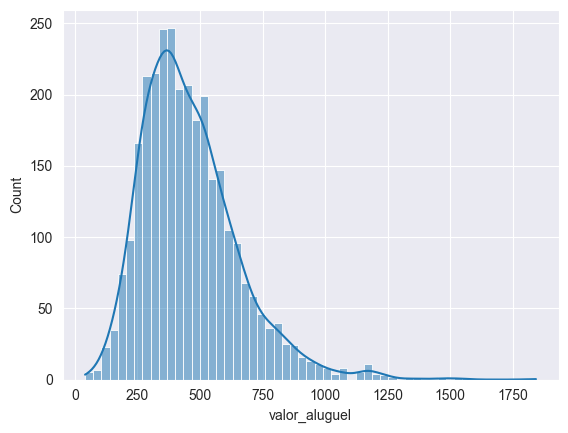

In [12]:
# Plota a distribuição de y
sns.histplot(data = y, kde = True);

<a id='target_analysis'></a>
### 2.3 Análise da variável preditora

In [13]:
# Calcula a correlação das variáveis com y
correlacao = df.corr()['valor_aluguel']
correlacao = correlacao.sort_values(ascending=False)
correlacao

valor_aluguel        1.0000
area_m2              0.5849
numero_banheiros     0.2503
codigo_localidade    0.1724
numero_cozinhas      0.1707
ano_construcao       0.1392
codigo_bairro       -0.0208
Name: valor_aluguel, dtype: float64

In [14]:
# Exibe a variável com maior correlação com valor aluguel (além dela própia)
print(f'A variável preditora será "{correlacao.index[1]}", já que possui a maior correlação linear com "valor_aluguel".')

A variável preditora será "area_m2", já que possui a maior correlação linear com "valor_aluguel".


In [15]:
# Define X como a variável com maior correlação com valor aluguel (além dela própia)
x = df[correlacao.index[1]]
x.head()

0     35
1    104
2     29
3     39
4     97
Name: area_m2, dtype: int64

In [16]:
# Descreve X com estatísticas
x.describe()

count   3000.0000
mean      67.3633
std       23.6758
min       20.0000
25%       51.0000
50%       65.0000
75%       81.0000
max      160.0000
Name: area_m2, dtype: float64

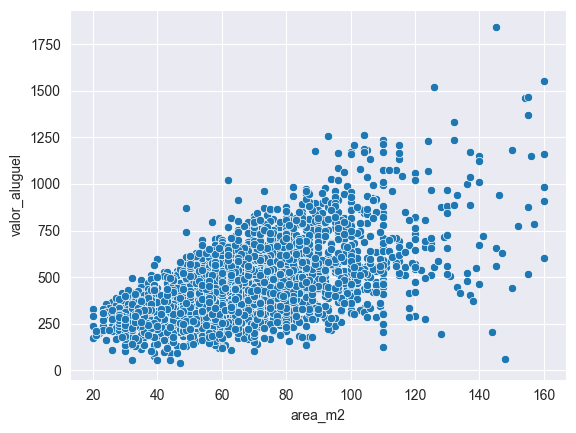

In [17]:
# Plota a distribuição de X e y
sns.scatterplot(x = x, y = y);

<a id='model'></a>
### 2.4 Modelo Estatístico

In [18]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(x)

In [19]:
# Criao modelo
modelo = sm.OLS(y, X)

In [20]:
# Treinado modelo
resultado = modelo.fit()

In [21]:
# Exibe as estatísticas do modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Mon, 29 May 2023   Prob (F-statistic):          6.84e-275
Time:                        09:31:58   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

In [22]:
# Predição de teste para alguns valores
resultado.predict([[1.0, 20],[1.0, 150], [1.0, 160]])

array([230.4709, 859.489 , 907.875 ])

In [23]:
# Função para plotar os pontos e a reta de regressão
def plotar_pontos_regressao(X, eixo_x, y, eixo_y, y_pred):
    plt.figure(figsize = (12, 8))
    plt.xlabel(eixo_x, size = 16)
    plt.ylabel(eixo_y, size = 16)
    plt.plot(X[eixo_x], y, "o", label = "Dados Reais")
    plt.plot(X[eixo_x], y_pred, "r-", label = "Reta de Regressão (Previsões do Modelo)")
    plt.legend(loc = "best")
    plt.show()

In [24]:
# Calcula os valores de y preditos pelo modelo
y_pred = resultado.fittedvalues

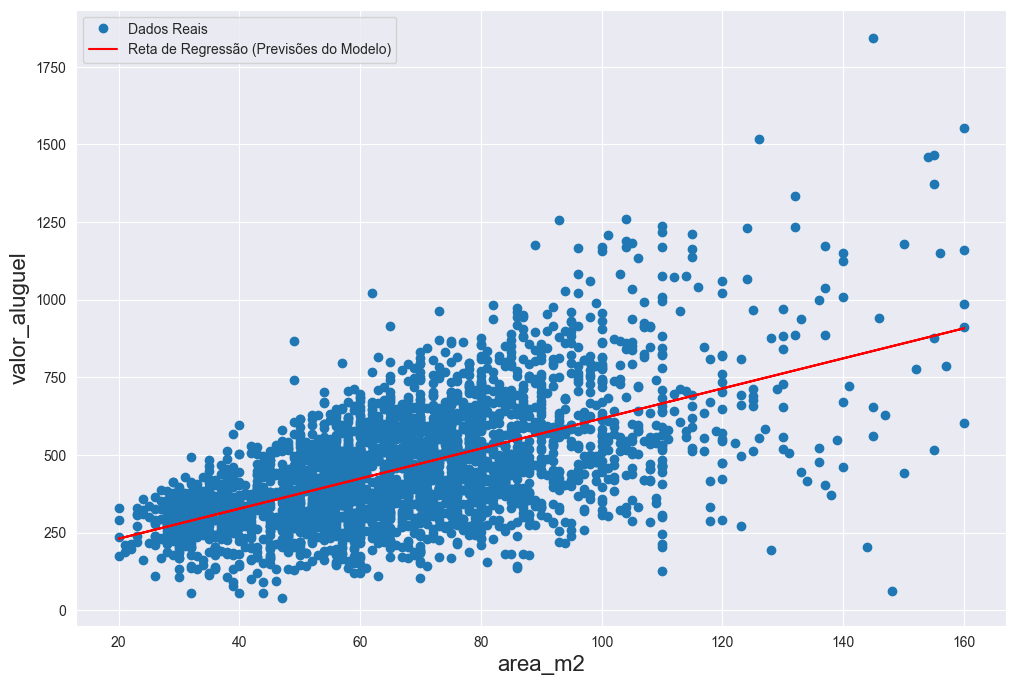

In [26]:
# Plota os pontos e a reta de regressão
plotar_pontos_regressao(X=X, eixo_x='area_m2', y=y, eixo_y='valor_aluguel', y_pred=y_pred)

---
<a id='conclusion'></a>
## 3. Conclusão

Pelo valor de R2 obtido, conclui-se que o modelo de regressão linear simples que usa a área em m2 para prever o valor do aluguel usando este conjunto de dados não gerou resultados satisfatórios para resolver este problema de negócio.

A biblioteca Statsmodels se provou bem simples, eficiente e descritiva para treinar um modelo de regressão linear simples e facilitou a análise estatística do problema.

---
<a id='references'></a>
## Referências

Data Science Academy - Fundamentos de Linguagem Python Para Análise de Dados e Data Science: https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science ,
Acessado em 29/05/2023.

Documentação do Statsmodels: https://www.statsmodels.org/devel/examples/notebooks/generated/predict.html ,
Acessado em 29/05/2023.